In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base

In [89]:
import numpy as np
import pandas as pd

In [90]:
import datetime as dt

In [91]:
database_path = "Resources/hawaii.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{database_path}")

# Reflect Tables into SQLAlchemy ORM

In [92]:
# Python SQL toolkit and Object Relational Mapper
Base = automap_base()
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [93]:
# Map Measurement and Station tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [94]:
Measurement

sqlalchemy.ext.automap.measurement

In [95]:
Station

sqlalchemy.ext.automap.station

In [96]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [97]:
engine.execute("SELECT * FROM Station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [98]:
engine.execute("SELECT * FROM Measurement ORDER BY date DESC").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

# Exploratory Climate Analysis

In [99]:
# Import datetime module
import datetime as dt

In [100]:
# inspector = inspect(engine)
# inspector.get_table_names()

In [101]:
# today = dt.date.today()
# today
# today_minus_12_months = today - dt.datetime

In [102]:
# Find total dates
session.query(Measurement.date).order_by(Measurement.date.desc()).all()

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [103]:
# Find earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [104]:
# Find latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [105]:
# Save latest date into a variable and in string type
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
type(latest_date)

str

In [106]:
print(latest_date)

2017-08-23


In [107]:
date_time_obj = dt.datetime.strptime(latest_date, '%Y-%m-%d') # %H:%M:%S.%f
date_time_obj.year

2017

In [108]:
one_year_back = date_time_obj.year - 1
one_year_back

2016

In [109]:
# Reconstruct the date 12 months back from the latest available date
latest_twelve_months_date = dt.date(one_year_back, date_time_obj.month, date_time_obj.day)
latest_twelve_months_date

datetime.date(2016, 8, 23)

In [110]:
# Check if the dates are sorted
sorted_desc = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
sorted_desc 

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [111]:
# Design a query to retrieve the last 12 months of precipitation data
session.query(Measurement.date).filter(Measurement.date > latest_twelve_months_date).\
                                filter(Measurement.date < latest_date).\
                                all()

[('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-02'),
 ('2016-09-03'),
 ('2016-09-04'),
 ('2016-09-05'),
 ('2016-09-06'),
 ('2016-09-07'),
 ('2016-09-08'),
 ('2016-09-09'),
 ('2016-09-10'),
 ('2016-09-11'),
 ('2016-09-12'),
 ('2016-09-13'),
 ('2016-09-14'),
 ('2016-09-15'),
 ('2016-09-16'),
 ('2016-09-17'),
 ('2016-09-18'),
 ('2016-09-19'),
 ('2016-09-20'),
 ('2016-09-21'),
 ('2016-09-22'),
 ('2016-09-23'),
 ('2016-09-24'),
 ('2016-09-25'),
 ('2016-09-26'),
 ('2016-09-27'),
 ('2016-09-28'),
 ('2016-09-29'),
 ('2016-09-30'),
 ('2016-10-01'),
 ('2016-10-02'),
 ('2016-10-03'),
 ('2016-10-04'),
 ('2016-10-05'),
 ('2016-10-06'),
 ('2016-10-07'),
 ('2016-10-08'),
 ('2016-10-09'),
 ('2016-10-10'),
 ('2016-10-11'),
 ('2016-10-12'),
 ('2016-10-13'),
 ('2016-10-14'),
 ('2016-10-15'),
 ('2016-10-16'),
 ('2016-10-17'),
 ('2016-10-18'),
 ('2016-10-19'),
 ('2016-10-20'),
 ('2016-10-21'

In [112]:
# Check which columns does the Measurement table has
# Try with inspect module
from sqlalchemy import inspect

In [113]:
inst = inspect(Measurement)
inst

<Mapper at 0x7fda2ec9f700; measurement>

In [114]:
attr_names = [c_attr.key for c_attr in inst.mapper.column_attrs]
attr_names

['id', 'station', 'date', 'prcp', 'tobs']

In [132]:
# Try getting columns with reflect module
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Meas = Base.classes.measurement
Sta = Base.classes.station

sqlalchemy.ext.automap.station

In [139]:
# Use the session to query Meas table and display the first 5 entries
for row in session.query(Meas.id, Meas.station, Meas.date, Meas.prcp, Meas.tobs).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.date <= latest_date).\
    limit(5).all():
    print(row)

(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)


In [140]:
# Use the session to query Meas table and display all entries
for row in session.query(Meas.id, Meas.station, Meas.date, Meas.prcp, Meas.tobs).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.date <= latest_date).\
    all():
    print(row)

(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 'USC00519397', '2016-09-12', 0.0, 78.0)
(2385, 'USC00519397', '2016-09-13', 0.02, 78.0)
(2

(19339, 'USC00516128', '2017-01-11', 0.0, 66.0)
(19340, 'USC00516128', '2017-01-12', 0.0, 68.0)
(19341, 'USC00516128', '2017-01-13', 0.0, 67.0)
(19342, 'USC00516128', '2017-01-14', 0.0, 70.0)
(19343, 'USC00516128', '2017-01-15', 0.01, 68.0)
(19344, 'USC00516128', '2017-01-16', 0.0, 68.0)
(19345, 'USC00516128', '2017-01-17', 0.0, 69.0)
(19346, 'USC00516128', '2017-01-18', 0.07, 73.0)
(19347, 'USC00516128', '2017-01-19', 0.0, 71.0)
(19348, 'USC00516128', '2017-01-20', 0.0, 67.0)
(19349, 'USC00516128', '2017-01-21', 0.08, 67.0)
(19350, 'USC00516128', '2017-01-22', 0.72, 68.0)
(19351, 'USC00516128', '2017-01-23', 0.85, 70.0)
(19352, 'USC00516128', '2017-01-24', 1.85, 67.0)
(19353, 'USC00516128', '2017-01-25', 2.64, 69.0)
(19354, 'USC00516128', '2017-01-26', 0.1, 67.0)
(19355, 'USC00516128', '2017-01-27', 0.03, 69.0)
(19356, 'USC00516128', '2017-01-28', 0.0, 64.0)
(19357, 'USC00516128', '2017-01-29', 0.55, 67.0)
(19358, 'USC00516128', '2017-01-30', 0.0, 66.0)
(19359, 'USC00516128', '2017-01

In [144]:
# Use the session to query Meas table sorted by date, and display all entries
for row in session.query(Meas.id, Meas.station, Meas.date, Meas.prcp, Meas.tobs).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    all():
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)
(12186, 'USC00519523', '2017-08-22', 0.0, 82.0)
(19549, 'USC00516128', '2017-08-22', 0.5, 76.0)
(2722, 'USC00519397', '2017-08-21', 0.0, 81.0)
(7634, 'USC00514830', '2017-08-21', 0.02, 79.0)
(12185, 'USC00519523', '2017-08-21', None, 82.0)
(19548, 'USC00516128', '2017-08-21', 0.56, 76.0)
(2721, 'USC00519397', '2017-08-20', 0.0, 81.0)
(7633, 'USC00514830', '2017-08-20', 0.01, 80.0)
(19547, 'USC00516128', '2017-08-20', None, 78.0)
(2720, 'USC00519397', '2017-08-19', 0.0, 79.0)
(7632, 'USC00514830', '2017-08-19', 0.0, 80.0)
(12184, 'USC00519523', '2017-08-19', None, 85.0)
(19546, 'USC00516128', '2017-08-19', 0.09, 71.0)
(2719, 'USC00519397', '2017-08-18', 0.0, 80.0)
(7631, 'USC00514830', '2017-08-18', 0.0, 77.0)
(14959, 'USC00519281', '2017-08-18', 0.06,

(2454, 'USC00519397', '2016-11-21', 0.01, 76.0)
(5181, 'USC00513117', '2016-11-21', 0.02, 75.0)
(8875, 'USC00517948', '2016-11-21', None, 73.0)
(11939, 'USC00519523', '2016-11-21', 0.07, 75.0)
(14698, 'USC00519281', '2016-11-21', 0.11, 73.0)
(19289, 'USC00516128', '2016-11-21', 2.87, 71.0)
(2453, 'USC00519397', '2016-11-20', 0.05, 76.0)
(5180, 'USC00513117', '2016-11-20', 0.11, 75.0)
(11938, 'USC00519523', '2016-11-20', 0.4, 80.0)
(14697, 'USC00519281', '2016-11-20', 0.39, 75.0)
(19288, 'USC00516128', '2016-11-20', None, 74.0)
(2452, 'USC00519397', '2016-11-19', 0.03, 75.0)
(5179, 'USC00513117', '2016-11-19', 0.11, 73.0)
(11937, 'USC00519523', '2016-11-19', 0.13, 76.0)
(14696, 'USC00519281', '2016-11-19', 0.11, 73.0)
(2451, 'USC00519397', '2016-11-18', 0.0, 77.0)
(5178, 'USC00513117', '2016-11-18', 0.01, 78.0)
(8874, 'USC00517948', '2016-11-18', None, 75.0)
(11936, 'USC00519523', '2016-11-18', 0.02, 77.0)
(14695, 'USC00519281', '2016-11-18', 0.0, 75.0)
(2450, 'USC00519397', '2016-11-17

In [167]:
# Save precipitation data in a list
prcp_list = []
date_list = []
for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all():
    prcp_list.append(row[1])
    date_list.append(row[0])
    print(f"Date: {row[0]}, precipitation {row[1]}")
prcp_list
#filter(Meas.prcp <> "None").\
    

Date: 2017-08-23, precipitation 0.0
Date: 2017-08-23, precipitation 0.0
Date: 2017-08-23, precipitation 0.08
Date: 2017-08-23, precipitation 0.45
Date: 2017-08-22, precipitation 0.0
Date: 2017-08-22, precipitation 0.0
Date: 2017-08-22, precipitation 0.5
Date: 2017-08-21, precipitation 0.0
Date: 2017-08-21, precipitation 0.02
Date: 2017-08-21, precipitation 0.56
Date: 2017-08-20, precipitation 0.0
Date: 2017-08-20, precipitation 0.01
Date: 2017-08-19, precipitation 0.0
Date: 2017-08-19, precipitation 0.0
Date: 2017-08-19, precipitation 0.09
Date: 2017-08-18, precipitation 0.0
Date: 2017-08-18, precipitation 0.0
Date: 2017-08-18, precipitation 0.06
Date: 2017-08-17, precipitation 0.0
Date: 2017-08-17, precipitation 0.05
Date: 2017-08-17, precipitation 0.01
Date: 2017-08-17, precipitation 0.13
Date: 2017-08-16, precipitation 0.0
Date: 2017-08-16, precipitation 0.07
Date: 2017-08-16, precipitation 0.12
Date: 2017-08-16, precipitation 0.42
Date: 2017-08-15, precipitation 0.02
Date: 2017-08-

Date: 2016-10-19, precipitation 0.0
Date: 2016-10-19, precipitation 0.06
Date: 2016-10-19, precipitation 0.0
Date: 2016-10-19, precipitation 0.0
Date: 2016-10-19, precipitation 0.11
Date: 2016-10-19, precipitation 0.0
Date: 2016-10-18, precipitation 0.0
Date: 2016-10-18, precipitation 0.05
Date: 2016-10-18, precipitation 0.03
Date: 2016-10-18, precipitation 0.02
Date: 2016-10-18, precipitation 0.02
Date: 2016-10-18, precipitation 0.48
Date: 2016-10-17, precipitation 0.01
Date: 2016-10-17, precipitation 0.03
Date: 2016-10-17, precipitation 0.12
Date: 2016-10-17, precipitation 0.01
Date: 2016-10-17, precipitation 0.38
Date: 2016-10-16, precipitation 0.0
Date: 2016-10-16, precipitation 0.0
Date: 2016-10-16, precipitation 0.0
Date: 2016-10-16, precipitation 0.0
Date: 2016-10-16, precipitation 0.0
Date: 2016-10-15, precipitation 0.0
Date: 2016-10-15, precipitation 0.0
Date: 2016-10-15, precipitation 0.02
Date: 2016-10-15, precipitation 0.0
Date: 2016-10-15, precipitation 0.04
Date: 2016-10-

[0.0,
 0.0,
 0.08,
 0.45,
 0.0,
 0.0,
 0.5,
 0.0,
 0.02,
 0.56,
 0.0,
 0.01,
 0.0,
 0.0,
 0.09,
 0.0,
 0.0,
 0.06,
 0.0,
 0.05,
 0.01,
 0.13,
 0.0,
 0.07,
 0.12,
 0.42,
 0.02,
 0.0,
 0.06,
 0.32,
 0.42,
 0.0,
 0.01,
 0.08,
 0.0,
 0.22,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.15,
 0.0,
 0.1,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06,
 0.02,
 0.04,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.06,
 0.0,
 0.05,
 0.0,
 0.25,
 0.02,
 0.12,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.06,
 0.02,
 0.0,
 0.23,
 0.3,
 0.0,
 0.13,
 0.14,
 0.01,
 0.0,
 0.09,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.12,
 0.3,
 0.0,
 0.03,
 0.12,
 0.0,
 0.05,
 0.11,
 0.3,
 0.05,
 0.58,
 1.19,
 0.61,
 0.84,
 0.0,
 0.06,
 0.07,
 0.2,
 0.8,
 0.03,
 0.07,
 0.12,
 0.0,
 0.2,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.1,
 0.03,
 0.12,
 0.0,
 0.0,
 0.33,
 0.06,
 0.7,
 0.0,
 0.09,
 0.0,

In [182]:
# Check count before and after filtering precipitation 'None'
prcp_list = []
date_list = []
for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all():
    prcp_list.append(row[1])
    date_list.append(row[0])
    #print(f"Date: {row[0]}, precipitation {row[1]}")
len(prcp_list)
print(f"There are {len(prcp_list)} entries including precipitation 'None' values.")    

There are 2015 entries including precipitation 'None' values.


In [180]:
# Check count before and after filtering precipitation 'None'
prcp_list_withNone = []
date_list_withNone = []
for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    all():
    prcp_list_withNone.append(row[1])
    date_list_withNone.append(row[0])
    #print(f"Date: {row[0]}, precipitation {row[1]}")
len(prcp_list_withNone)
print(f"There are total of {len(prcp_list_withNone)} entries with provided filters.")   

There are total of 2223 entries with provided filters.


In [178]:
difference = len(prcp_list_withNone) - len(prcp_list)
print(f"There are {difference} entries without precipitation data.")

There are 208 entries without precipitation data.


In [ ]:
# Create a data frame with Date and Precipitation columns

In [184]:
# Convert date list into datetime format for easier handling of plotting
date_list_datetime = pd.to_datetime(date_list)
date_list_datetime

DatetimeIndex(['2017-08-23', '2017-08-23', '2017-08-23', '2017-08-23',
               '2017-08-22', '2017-08-22', '2017-08-22', '2017-08-21',
               '2017-08-21', '2017-08-21',
               ...
               '2016-08-25', '2016-08-25', '2016-08-25', '2016-08-25',
               '2016-08-24', '2016-08-24', '2016-08-24', '2016-08-24',
               '2016-08-24', '2016-08-24'],
              dtype='datetime64[ns]', length=2015, freq=None)

In [189]:
# Check count before and after filtering precipitation 'None'. 
# Note: do not extract into list.
prcp = [row[1] for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]
date = [row[0] for row in session.query(Meas.date, Meas.prcp).\
    order_by(Measurement.date.desc()).\
    filter(Meas.date <= latest_date).\
    filter(Meas.date > latest_twelve_months_date).\
    filter(Meas.prcp != 'None').\
    all()]

['2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-12',
 '2017-08-12',
 '2017-08-12',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-09',
 '2017-08-09',
 '2017-08-09',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-05',
 '2017-08-05',
 '2017-08-

In [194]:
# Create Precipitation dataframe to explore plotting options easier
prcp_df = pd.DataFrame({'Date': date, 'Precipitation': prcp})
prcp_df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


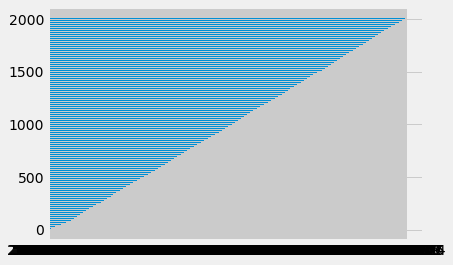

In [192]:
fig, ax = plt.subplots()
ypos = range(len(prcp))
ax.barh(ypos, date[:])
plt.show()

In [116]:
#  PLOT the results

In [117]:
# t = dt.time(1, 2, 3)
# print(t)
# print('hour  :', t.hour)
# print('minute:', t.minute)
# print('second:', t.second)
# print('microsecond:', t.microsecond)
# print('tzinfo:', t.tzinfo)

In [118]:
# t = dt.date(1, 2, 3)
# print(t)
# print('year  :', t.year)
# print('month:', t.month)
# print('day:', t.day)

In [119]:
# latest_date_year = latest_date.year

In [120]:
# # Import func and text methods from sqlalchemy to work with dates
# from sqlalchemy import func, text

In [121]:
# from datetime import datetime, timedelta

In [122]:
# delta = timedelta(microseconds=-1)
# delta

In [123]:
# twelve_months_earlier = latest_date - dt.timedelta(days=365)

In [124]:
# last_twelve_months = latest_date - dt.date.today()
# last_twelve_months

In [125]:
results = session.query(Measurement.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == 'IBM').all()


AttributeError: type object 'measurement' has no attribute 'high_price'

In [ ]:
.\
                filter(Measurement.date > dt.date.today().\
                filter(Measurement.date < dt.date.today))

In [ ]:
last_365_days = dt.date.today() - dt.timedelta(days=365)
last_365_days

In [ ]:
last_12_months = dt.date.today() - dt.timedelta(months=12)
last_12_months

In [ ]:
week_ago = dt.date.today() - dt.timedelta(days=7)
week_ago

In [ ]:
Measurement.date

In [ ]:
print(dt.date.today())

In [ ]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
